In [1]:
# import dependencies
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score

In [2]:
#read in the data
data = pd.read_csv('car_prices.csv')

In [3]:
#display the data
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [218]:
#drop the na 
data = data.drop('transmission', axis=1)

In [4]:
data = data.dropna()

In [5]:
len(data)

472325

In [6]:
#extract the years from the saledate
pattern = r'\b(\d{4})\b'
years = data['saledate'].str.extract(pattern)
len(years)


472325

In [7]:
#set the sales_year and sales_month columns
data['sales_year'] = years
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sales_year
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),2015
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),2015
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),2014


In [8]:
#convert sales_year to integer
data['sales_year'] = data['sales_year'].astype(int)

In [9]:
#calculate the age of the car in years
data['car_age'] = (data['sales_year']) - (data['year'] - 1)
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sales_year,car_age
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014,0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014,0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),2015,2
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),2015,1
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),2014,1


In [10]:
#drop the model year column in lieu of the car age
#drop unnecessary columns
data = data.drop(['vin','trim','seller','saledate', 'year', 'sales_year'], axis=1)

In [11]:
data.columns

Index(['make', 'model', 'body', 'transmission', 'state', 'condition',
       'odometer', 'color', 'interior', 'mmr', 'sellingprice', 'car_age'],
      dtype='object')

In [226]:
#check the color value counts for binning
color_values = data['color'].value_counts()
color_values

color
black        106599
white        101834
gray          80001
silver        79514
blue          48532
red           41635
—             24371
gold          10471
green         10361
beige          8591
burgundy       8501
brown          6493
orange         1940
purple         1477
off-white      1398
yellow         1196
charcoal        464
turquoise       215
pink             41
lime             14
Name: count, dtype: int64

In [227]:
#replace low frequency colors (<75% of value count i.e. lowest percentile)
colors_to_replace = []
# Loop through the colors to append any infrequent colors (< 37366)
for key, value in color_values.items():
  if value < 37366:
    colors_to_replace.append(key)

# Replace in dataframe
for color in colors_to_replace:
    data['color'] = data['color'].replace(color,"Other")

# Check to make sure binning was successful
data['color'].value_counts()

color
black     106599
white     101834
gray       80001
silver     79514
Other      75533
blue       48532
red        41635
Name: count, dtype: int64

In [228]:
#display the dataframe
data.head()

,make,model,body,state,condition,odometer,color,interior,mmr,sellingprice,car_age
0,Kia,Sorento,SUV,ca,5.0,16639.0,white,black,20500.0,21500.0,0
1,Kia,Sorento,SUV,ca,5.0,9393.0,white,beige,20800.0,21500.0,0
2,BMW,3 Series,Sedan,ca,45.0,1331.0,gray,black,31900.0,30000.0,2
3,Volvo,S60,Sedan,ca,41.0,14282.0,white,black,27500.0,27750.0,1
4,BMW,6 Series Gran Coupe,Sedan,ca,43.0,2641.0,gray,black,66000.0,67000.0,1


In [229]:
#check the interior color value counts for binning
interiors = data['interior'].value_counts()

In [230]:
interiors_to_replace = []
# Loop through the interiors to append any underrepresented values < 37723 to the list
for key, value in interiors.items():
  if value < 37723:
    interiors_to_replace.append(key)

# Replace in dataframe
for color in interiors_to_replace:
    data['interior'] = data['interior'].replace(color,"Other")

# Check to make sure binning was successful
data['interior'].value_counts()

interior
black    238663
gray     170422
beige     57868
tan       41703
Other     24992
Name: count, dtype: int64

In [231]:
#display the new dataframe
data.head()

,make,model,body,state,condition,odometer,color,interior,mmr,sellingprice,car_age
0,Kia,Sorento,SUV,ca,5.0,16639.0,white,black,20500.0,21500.0,0
1,Kia,Sorento,SUV,ca,5.0,9393.0,white,beige,20800.0,21500.0,0
2,BMW,3 Series,Sedan,ca,45.0,1331.0,gray,black,31900.0,30000.0,2
3,Volvo,S60,Sedan,ca,41.0,14282.0,white,black,27500.0,27750.0,1
4,BMW,6 Series Gran Coupe,Sedan,ca,43.0,2641.0,gray,black,66000.0,67000.0,1


In [232]:
#check the range of odometer values
min = data['odometer'].min()
max = data['odometer'].max()
print(f'The range of mileage values is from {min} to {max}')

The range of mileage values is from 1.0 to 999999.0


In [233]:
#bin the odometer into mileage by range 0-1000, 1000-10000, 10000-100000, 1000-200000, 200000+
bins = [0, 1000, 10000, 100000, 200000, float('inf')]

labels = ['0-1000', '1000-10000', '10000-100000', '100000-200000', '200000+']

data['mileage'] = pd.cut(data['odometer'], bins=bins, labels=labels, right=False)

binned_counts = data['mileage'].value_counts().sort_index()

print(binned_counts)

mileage
0-1000             2344
1000-10000        22813
10000-100000     385564
100000-200000    112634
200000+           10293
Name: count, dtype: int64


In [234]:
#drop the old odometer column
data = data.drop('odometer', axis=1)

In [12]:
#display the dataframe
data.head()

,make,model,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,car_age
0,Kia,Sorento,SUV,automatic,ca,5.0,16639.0,white,black,20500.0,21500.0,0
1,Kia,Sorento,SUV,automatic,ca,5.0,9393.0,white,beige,20800.0,21500.0,0
2,BMW,3 Series,Sedan,automatic,ca,45.0,1331.0,gray,black,31900.0,30000.0,2
3,Volvo,S60,Sedan,automatic,ca,41.0,14282.0,white,black,27500.0,27750.0,1
4,BMW,6 Series Gran Coupe,Sedan,automatic,ca,43.0,2641.0,gray,black,66000.0,67000.0,1


In [236]:
#check the value counts of the makes
make = data['make'].value_counts()
make

make
Ford             91907
Chevrolet        58817
Nissan           53085
Toyota           38991
Dodge            30100
Honda            26373
Hyundai          21469
BMW              20140
Kia              17868
Chrysler         16914
Mercedes-Benz    16631
Infiniti         15168
Jeep             15013
Volkswagen       12171
Lexus            11670
GMC              10317
Mazda             8171
Cadillac          7250
Acura             5736
Audi              5720
Lincoln           5611
Subaru            4935
Buick             4928
Ram               4545
Pontiac           4244
Mitsubishi        4029
Volvo             3628
MINI              3167
Saturn            2656
Mercury           1889
Land Rover        1708
Scion             1647
Jaguar            1377
Porsche           1361
Suzuki            1026
FIAT               857
HUMMER             786
Saab               453
smart              389
Oldsmobile         333
Isuzu              188
Maserati           131
Bentley            115
Aston 

In [237]:
#bin together the underrepresented makes
makes_to_replace = []
# Loop through the atv to append any values below 4000 to the list
for key, value in make.items():
  if value < 4000:
    makes_to_replace.append(key)

# Replace in dataframe
for make in makes_to_replace:
    data['make'] = data['make'].replace(make,"Other")

# Check to make sure binning was successful
data['make'].value_counts()

make
Ford             91907
Chevrolet        58817
Nissan           53085
Toyota           38991
Dodge            30100
Honda            26373
Other            21845
Hyundai          21469
BMW              20140
Kia              17868
Chrysler         16914
Mercedes-Benz    16631
Infiniti         15168
Jeep             15013
Volkswagen       12171
Lexus            11670
GMC              10317
Mazda             8171
Cadillac          7250
Acura             5736
Audi              5720
Lincoln           5611
Subaru            4935
Buick             4928
Ram               4545
Pontiac           4244
Mitsubishi        4029
Name: count, dtype: int64

In [238]:
#display the dataframe
data.head()

,make,model,body,state,condition,color,interior,mmr,sellingprice,car_age,mileage
0,Kia,Sorento,SUV,ca,5.0,white,black,20500.0,21500.0,0,10000-100000
1,Kia,Sorento,SUV,ca,5.0,white,beige,20800.0,21500.0,0,1000-10000
2,BMW,3 Series,Sedan,ca,45.0,gray,black,31900.0,30000.0,2,1000-10000
3,Other,S60,Sedan,ca,41.0,white,black,27500.0,27750.0,1,10000-100000
4,BMW,6 Series Gran Coupe,Sedan,ca,43.0,gray,black,66000.0,67000.0,1,1000-10000


In [239]:
#find the minimum and maximum condition ratings for binnning
print(f'condition minimum: {data["condition"].min()} condition maximum: {data["condition"].max()}')

condition minimum: 1.0 condition maximum: 49.0


In [240]:
#bin the condition into condition by range 1-10, 10-20, 20-30, 30-40, 40+
bins = [1, 10, 20, 30, 40, float('inf')]

labels = ['0-10', '10-20', '20-30', '30-40', '40+']

data['condition'] = pd.cut(data['condition'], bins=bins, labels=labels, right=False)

binned_counts = data['condition'].value_counts().sort_index()

print(binned_counts)

condition
0-10      67600
10-20     41622
20-30    108079
30-40    158500
40+      157847
Name: count, dtype: int64


In [241]:
data['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'G37 Coupe', 'Mega Cab',
       'Cab Plus 4', 'Q60 Coupe', 'Beetle Convertible', 'TSX Sport Wagon',
       'Promaster Cargo Van', 'Cab Plus', 'GranTurismo Convertible',
       'CTS-V Wagon', 'Ram Van', 'convertible', 'minivan', 'suv',
       'Transit Van', 'van', 'regular-cab', 'g sedan', 'g coupe',
       'hatchback', 'king cab', 'supercrew', 'g convertible', 'coupe',
       'crew cab', 'wagon', 'double cab', 'e-series van', 'regular cab',
       'quad cab', 'g37 convertible', 'supercab', 'extended cab',
       'crewmax c

In [242]:
#function for body mapping
def map_car_body_type(body_type):
    # Convert to lowercase for case insensitivity
    body_type = body_type.lower()  
    if 'suv' in body_type:
        return 'SUV'
    elif 'sedan' in body_type:
        return 'Sedan'
    elif 'convertible' in body_type:
        return 'Convertible'
    elif 'coupe' in body_type:
        return 'Coupe'
    elif 'wagon' in body_type:
        return 'Wagon'
    elif 'hatchback' in body_type:
        return 'Hatchback'
    elif 'van' in body_type or 'minivan' in body_type:
        return 'Van'
    elif 'cab' or 'crew' in body_type:
        return 'Truck'
    else:
        return 'Other'
#run the function on the data['body'] column and add to a list
t_body = []
car_body_types = data['body']
for body_type in car_body_types:
    t_body.append(map_car_body_type(body_type))
data['body_type'] = t_body




In [244]:
#check data types
data.dtypes

make              object
model             object
body              object
state             object
condition       category
color             object
interior          object
mmr              float64
sellingprice     float64
car_age            int64
mileage         category
body_type         object
dtype: object

In [245]:
#find the unique values for categorical columns
makes = data['make'].unique()
models = data['model'].unique()
states = data['state'].unique()
colors = data['color'].unique()
interiors =data['interior'].unique()
condition = data['condition'].unique()
mileage = data['mileage'].unique()
bodies = data['body_type'].unique()


In [246]:
#create the maps
def mapping(arr):
    return {value: idx for idx, value in enumerate(arr)}
car_make = mapping(makes)
car_model = mapping(models)
car_body = mapping(bodies)
car_state = mapping(states)
car_color = mapping(colors)
car_interior = mapping(interiors)
car_condition = mapping(condition)
car_mileage= mapping(mileage)



In [247]:
#map the categorical columns
cleaned_data = pd.DataFrame()
cleaned_data['make'] = data['make'].map(car_make)
cleaned_data['model'] = data['model'].map(car_model)
cleaned_data['body'] = data['body_type'].map(car_body)
cleaned_data['state'] = data['state'].map(car_state)
cleaned_data['color'] = data['color'].map(car_color)
cleaned_data['interior'] = data['interior'].map(car_interior)
cleaned_data['condition'] = data['condition'].map(car_condition)
cleaned_data['mileage'] = data['mileage'].map(car_mileage)
cleaned_data['car_age'] = data['car_age']


In [248]:
#check the datatypes
cleaned_data.head()

,make,model,body,state,color,interior,condition,mileage,car_age
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1,0
2,1,1,1,0,1,0,1,1,2
3,2,2,1,0,0,0,1,0,1
4,1,3,1,0,1,0,1,1,1


In [249]:
#convert the floats/categories to integer
cleaned_data[['mileage','condition','body']] = cleaned_data[['mileage','condition', 'body']].astype(int)

In [250]:
#check the datatypes
cleaned_data.dtypes

make         int64
model        int64
body         int32
state        int64
color        int64
interior     int64
condition    int32
mileage      int32
car_age      int64
dtype: object

In [251]:
#add the sellingprice to the cleaned dataset
cleaned_data['sellingprice'] = data['sellingprice']

In [252]:
#export the cleaned data
cleaned_data.to_csv('cleaned_data.csv')

In [253]:
#define target and features
X = cleaned_data.drop(['sellingprice'], axis=1)
y = cleaned_data['sellingprice']

In [254]:
#split the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [255]:
#find the accuracy and p-values of the training sets
f_score = chi2(X_train, y_train)

In [256]:
#display the values
f_score

(array([  34195.70727964, 4152463.5448564 ,   15632.52195732,
          69226.12315598,   13449.04740062,   48685.39881706,
          60182.25359982,  572470.68572296,  720095.93828713]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [257]:
# put the p-values into a series and sort them ascending
p_values = pd.Series(f_score[1], index = X_train.columns)
p_values.sort_values(ascending = True, inplace = True)

In [258]:
#display the p-values for each column
p_values

make         0.0
model        0.0
body         0.0
state        0.0
color        0.0
interior     0.0
condition    0.0
mileage      0.0
car_age      0.0
dtype: float64

<Axes: >

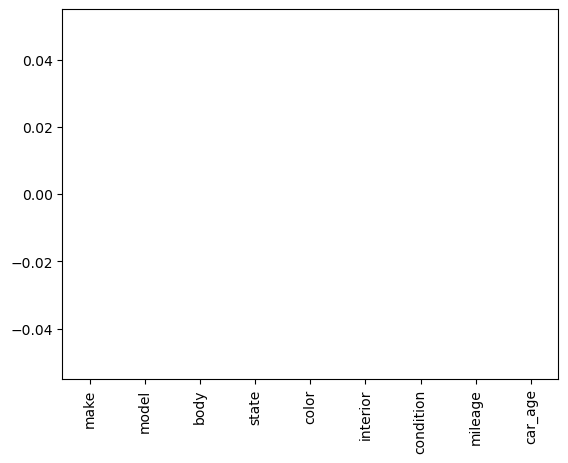

In [259]:
#plot the p-values for visual selection
p_values.plot.bar()